In [195]:
import numpy as np
import matplotlib.pyplot as plt
import cubic_potentials as cp
from scipy.integrate import odeint
from scipy.interpolate import interp1d, interp2d
import importlib as im

In [286]:
sep = 500

dat = np.load("efield_needle_2d_%dum.npz"%sep)
xvals, yvals = dat['x'], dat['y']
Ex, Ey = dat['Ex'], dat['Ey']

Ex_interp = interp2d(xvals[0,:], yvals[:,0], Ex)
Ey_interp = interp2d(xvals[0,:], yvals[:,0], Ey)

In [287]:
def Vneedle_func_duty(t, V, duty, T):
    """ V - voltage [V]
        duty -- duty cycle fraction
        T -- period in s
    """
    if(t%T < duty*T):
        return V
    else:
        return 0

In [306]:
def Vneedle_increasing(t, Vlist, ton, toff, tstep=1e-6):
    Vout = []
    for V in Vlist:
        Vout += int(toff/tstep)*[0]
        if(np.abs(V) < 100):
            div_fac = 1
        elif np.abs(V) < 1000:   
            div_fac = 10
        else:
            div_fac = 100
        Vout += int(ton*div_fac/tstep)*[V/div_fac]

    return np.array(Vout)

In [312]:
### calculate the voltage steps for the ratchet 

xvec = np.linspace(-2, 0, 100)
dt = 10e-6 ## 10 us pulse
mu = 100 ## cm^2/Vs
dx = np.arange(0.01, 1.5, 0.01)
xvals = -1.0*dx

ex = np.zeros_like(dx)
for j, d in enumerate(dx):
    ex[j]=Ex_interp(-d, 0)

## now step through all the bins and update the positions
curr_dx = 1.0*dx
Vlist = np.zeros_like(curr_dx)
for j,d in enumerate(dx):

    Vlist[j] = curr_dx[j]/(dt*mu*Ex_interp(-curr_dx[j],0))
    
    for k in range(j, len(curr_dx)):
        curr_dx[k] -= dt * mu * Ex_interp(-curr_dx[k],0)*Vlist[j]

#plt.figure()
#plt.plot(dx, ex, 'o-')

#plt.figure()
#plt.plot(dx, Vlist, 'o-')
#plt.ylim(0,1e4)

#print(Vlist)

time_on = 10e-6 #on time for needle, seconds
time_off = 2e-3 # off time for needle, seconds
tstep = 1e-6 # step time, seconds

v = cp.Vneedle_increasing(t, Vlist, time_on, time_off)
t = np.arange(0, len(v)*tstep, tstep)
Vneedle = interp1d(t, v)

In [314]:
### run the simulation for n events
im.reload(cp)
cp.do_full_sim(Ex_interp, Ey_interp, Vneedle, q_sphere=-100, pressure=10, side_length=4)

AttributeError: module 'cubic_potentials' has no attribute 'do_full_sim'

Curr iter 0, curr time 0.000000
Curr iter 10000, curr time 0.010000
Curr iter 20000, curr time 0.020000
Curr iter 30000, curr time 0.030000
Curr iter 40000, curr time 0.040000
Curr iter 50000, curr time 0.050000
Curr iter 60000, curr time 0.060000
Curr iter 70000, curr time 0.070000
Curr iter 80000, curr time 0.079969
In sphere!


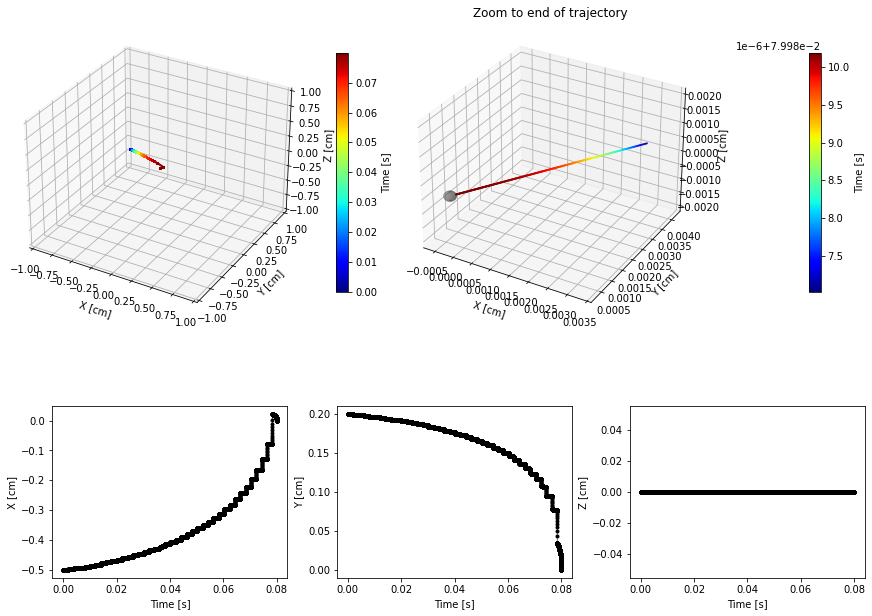

In [310]:
init_pos = [-0.5,0.2,0]
p = 10 ## mbar

mu = 100*(10/p) ## cm^2/Vs at 10 mbar
#Vneedle = lambda t: Vneedle_func_duty(t, 0, 0.001, 0.01) # V

v = Vneedle_increasing(t, Vlist, 10e-6, 2e-3)
t = np.arange(0, len(v)*1e-6, 1e-6)
Vneedle = interp1d(t, v)

im.reload(cp)

traj = cp.track_particle_to_needle(init_pos, mu, Ex_interp, Ey_interp, 1e-6, Vneedle, max_t=0.2, q_sphere=-1000, needle_face=sep*1e-4)
title = "" #"P = %d mbar, $f_{AC}$ = %.1f kHz, $V_{AC}$ = %d V,\n $q_{sph}$ = %d $e$, Init. pos = (%.1f,%.1f,%.1f) cm"%(p, fAC/1e3, VAC, q_sphere, *init_pos)
cp.plot3Dtraj(traj, title=title)

[ -15.57402673  -16.5432622   -17.53993338  -18.56891498  -19.5683458
  -20.64817586  -21.71986274  -22.79850527  -23.88017016  -25.09843377
  -26.15083058  -27.41982984  -28.40134962  -29.84935888  -30.78970832
  -32.29140767  -33.49711773  -34.57563028  -36.32909626  -37.23597442
  -38.30295264  -39.86332905  -41.69585495  -42.96960508  -44.28765839
  -45.49832586  -46.47204248  -48.45259559  -49.98410116  -51.73877843
  -52.47350305  -54.92617492  -55.8961229   -57.40445847  -59.36613096
  -60.53959335  -62.45479023  -64.45494568  -65.49204153  -67.31314733
  -69.29438904  -70.53040951  -72.02169684  -74.5337721   -75.57969931
  -77.94496309  -79.41735034  -82.43322081  -82.91780207  -84.77194603
  -87.13975238  -88.6505152   -91.30267503  -92.45097635  -95.72860132
  -99.09296062  -99.8224352  -102.24789649 -104.78628078 -104.54356399
 -107.59632784 -108.79816281 -110.67274604 -112.63753351 -114.81559648
 -117.00489361 -120.05238234 -121.65938272 -123.22692711 -126.24230298
 -129.4

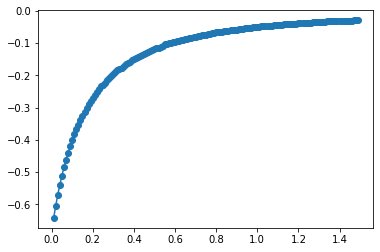

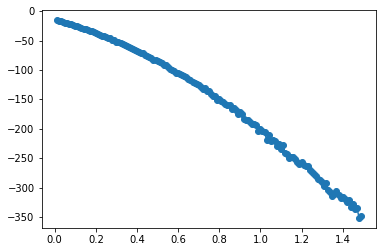

In [252]:
xvec = np.linspace(-2, 0, 100)
dt = 10e-6 ## 10 us pulse
mu = 100 ## cm^2/Vs
dx = np.arange(0.01, 1.5, 0.01)
xvals = -1.0*dx

ex = np.zeros_like(dx)
for j, d in enumerate(dx):
    ex[j]=Ex_interp(-d, 0)

## now step through all the bins and update the positions
curr_dx = 1.0*dx
Vlist = np.zeros_like(curr_dx)
for j,d in enumerate(dx):

    Vlist[j] = curr_dx[j]/(dt*mu*Ex_interp(-curr_dx[j],0))
    
    for k in range(j, len(curr_dx)):
        curr_dx[k] -= dt * mu * Ex_interp(-curr_dx[k],0)*Vlist[j]

plt.figure()
plt.plot(dx, ex, 'o-')

plt.figure()
plt.plot(dx, Vlist, 'o-')
#plt.ylim(0,1e4)

print(Vlist)

In [236]:
Ex_interp(-0.5,0)

array([-0.11914958])

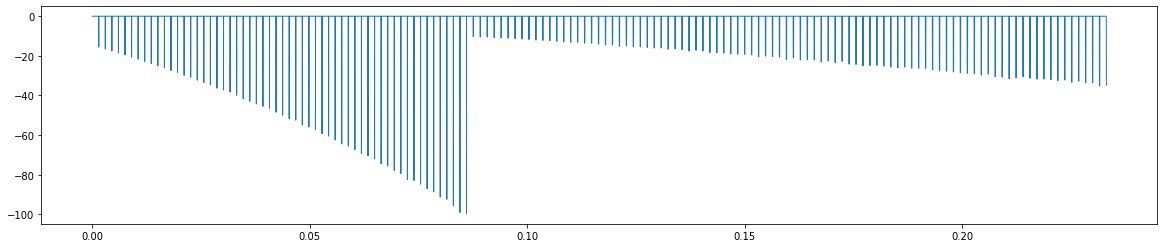

In [279]:
v = Vneedle_increasing(t, Vlist, 10e-6, 1.5e-3)
t = np.arange(0, len(v)*1e-6, 1e-6)

plt.figure(figsize = (20,4))
plt.plot(t, v, lw=1)
#plt.xlim(0.05, 0.07)